In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.distributions as distributions
# m = nn.Softmax()
# input = torch.tensor([-1, 0., 1.])
# output = m(input)
# print(output)
# input = torch.tensor([0, 1, 0, 1])
# F.one_hot(input, num_classes=5).shape
# probs = torch.tensor([[0.2,0.3,0.5],[0.5,0.5,0.5]])
# logits = torch.log(probs)
# # distr = distributions.Categorical(probs=logits)
# # out = distr.sample()
# out=torch.multinomial(torch.exp(logits), 5,replacement=True)
# print(out)
# input = torch.randint(0, 3, (5,3), dtype=torch.int64)
# input=torch.tensor([[0, 2, 0],
#         [2, 0, 0],
#         [2, 2, 2],
#         [2, 1, 1],
#         [1, 1, 1]])
# batch_size, count = input.shape
# temp = torch.arange(batch_size) * count
# temp = temp[:,None].expand(input.shape)
# print(input, input+temp)
# torch.bincount((input+temp).reshape(-1), minlength=count*batch_size).reshape([batch_size,-1])
# y = input = torch.randint(0, 3, (5,3), dtype=torch.int64)
# print(y)
# torch.tile(y, (3,)).reshape([-1]+list (y.shape[1:]))
# m = nn.Identity()
# input = torch.randn(2, 4)
# output = m(input)
# print(input, output)
# torch.zeros((2,3,4)).shape
# input = torch.randint(0, 3, (5,3), dtype=torch.int64)
# torch.repeat_interleave(torch.arange(15), input.reshape(-1)).shape
# torch.normal(0, 1,size=input.shape).shape
# no_grad = torch.tensor(3.0)
# x = no_grad.clone().detach().requires_grad_(True)
# # with tf.GradientTape() as g:
# #   g.watch(x)
# y = torch.exp(x) * x
# y.backward()
# print(x.grad.data,x, no_grad.requires_grad)
# y_true = [[0, 1], [0, 0]]
# y_pred = [[0.6, 0.4], [0.4, 0.6]]
# kl_numpy = np.array(y_true)*np.log(np.array(y_true)/np.array(y_pred) + 1e-10)
# print(kl_numpy)
# print(kl_numpy.sum(axis=-1))
# kl = nn.KLDivLoss(reduction='none')
# kl( (torch.tensor(y_pred)).log(), (torch.tensor(y_true)+1e-10)).sum(-1)
batch_size = 2
nw = 3
nh = 4
nc = 5
nhist = 6
torch.concat([torch.tensor([batch_size]), torch.tensor([nw, nh, nc * nhist])], dim=0)

tensor([ 2,  3,  4, 30])

In [26]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
import tensorflow as tf
import numpy as np
# indices = [0, 1, 0, 1]
# depth = 5
# a=tf.one_hot(indices, depth)
# print(a.shape)
# samples = tf.random.categorical(tf.math.log([[0.2,0.3,0.5],[0.5,0.5,0.5]]), 5)
# print(samples)
# tf.identity(a)
# tf.random.normal(a.shape).shape
# x = tf.constant(3.0)
# with tf.GradientTape() as g:
#   g.watch(x)
#   z = tf.exp(x)
#   y = z*z
# dy_dx = g.gradient(y, x)
# print(dy_dx,x)
# x *= x
# with tf.GradientTape() as g:
#   g.watch(x)
#   y = x * x
# dy_dx = g.gradient(y, x)
# print(dy_dx)

# y_true = [[0, 1], [0, 0]]
# y_pred = [[0.6, 0.4], [0.4, 0.6]]
# kl_numpy = np.array(y_true)*np.log(np.array(y_true)/np.array(y_pred) + 1e-10)

# print(np.array(y_true)*np.log(np.array(y_true)/np.array(y_pred)+ 1e-10))
# print(kl_numpy.sum(axis=-1))
# # Using 'auto'/'sum_over_batch_size' reduction type.
# kl = tf.keras.losses.KLDivergence()
# kl(y_true, y_pred).numpy()
# kl = tf.keras.losses.KLDivergence(
#     reduction=tf.keras.losses.Reduction.NONE)
# kl(y_true, y_pred).numpy()
batch_size = 2
num_action_samples = 2048
actions_selected = tf.random.categorical([4096])
repeat_indices = tf.repeat(
        tf.range(batch_size * num_action_samples), actions_selected)
print(repeat_indices.shape)

AttributeError: module 'tensorflow._api.v2.random' has no attribute 'randn'

In [22]:
from environments.particle.particle import ParticleEnv
import gym
import torch
env = ParticleEnv()
batch_size=2
num_action_samples=2048
obs = env.reset()
# obs = torch.tensor(time_step)[None, Ellipsis]
# obs = torch.concat([obs] * (batch_size * num_action_samples),
#                             axis=0)
# "Batch" the observations by replicating
for key in obs.keys():
    batch_obs = torch.tensor(obs[key])[None, Ellipsis]
    obs[key] = torch.concat([batch_obs] * (batch_size * num_action_samples),axis=0)
print(type(env.observation_space.spaces))
num_dict=1
if isinstance(env.observation_space.spaces, dict):
    num_dict = len(env.observation_space.spaces.keys())
print(num_dict)
# env = suite_gym.wrap_env(env)
# obs_spec, act_spec, _ = spec_utils.get_tensor_specs(env)
# for key in list(env.observation_space.spaces):
# env = gym.make("InvertedPendulum-v2")
# obs_dim = env.observation_space.shape[0]
# act_dim = env.action_space.shape[0]
# print("obs space", env.observation_space, "action space",env.action_space)
# print("obs space", obs_dim, "action space",act_dim)

<class 'collections.OrderedDict'>
4


tensor([ 0.3684, -0.3474])


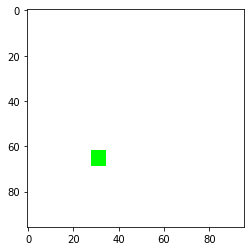

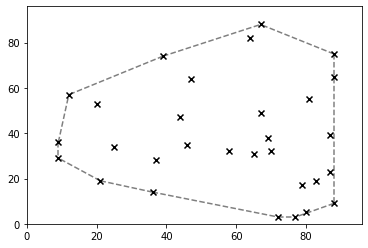

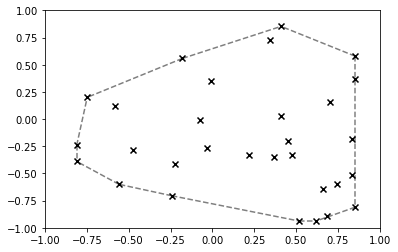

Target bounds:
[[-1. -1.]
 [ 1.  1.]]


In [3]:
import dataclasses
from typing import Optional, Tuple

import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor


@dataclasses.dataclass
class DatasetConfig:
    dataset_size: int = 30
    """The size of the dataset. Useful for sample efficiency experiments."""

    resolution: Tuple[int, int] = (96, 96)
    """The resolution of the image."""

    pixel_size: int = 7
    """The size of the pixel whose coordinates we'd like to regress. Must be odd."""

    pixel_color: Tuple[int, int, int] = (0, 255, 0)
    """The color of the pixel whose coordinates we'd like to regress."""

    seed: Optional[int] = None
    """Whether to seed the dataset. Disabled if None."""


class CoordinateRegression(Dataset):
    """Regress the coordinates of a colored pixel block on a white canvas."""

    def __init__(self, config: DatasetConfig) -> None:
        if not config.pixel_size % 2:
            raise ValueError("'pixel_size' must be odd.")

        self.dataset_size = config.dataset_size
        self.resolution = config.resolution
        self.pixel_size = config.pixel_size
        self.pixel_color = config.pixel_color
        self.seed = config.seed

        self.reset()

    def reset(self) -> None:
        if self.seed is not None:
            np.random.seed(self.seed)

        self._coordinates = self._sample_coordinates(self.dataset_size)
        self._coordinates_scaled = self._scale_coordinates(self._coordinates)

    def exclude(self, coordinates: np.ndarray) -> None:
        """Exclude the given coordinates, if present, from the previously sampled ones.

        This is useful for ensuring the train set does not accidentally leak into the
        test set.
        """
        mask = (self.coordinates[:, None] == coordinates).all(-1).any(1)
        num_matches = mask.sum()
        while mask.sum() > 0:
            self._coordinates[mask] = self._sample_coordinates(mask.sum())
            mask = (self.coordinates[:, None] == coordinates).all(-1).any(1)
        self._coordinates_scaled = self._scale_coordinates(self._coordinates)
        print(f"Resampled {num_matches} data points.")

    def get_target_bounds(self) -> np.ndarray:
        """Return per-dimension target min/max."""
        return np.array([[-1.0, -1.0], [1.0, 1.0]])

    def _sample_coordinates(self, size: int) -> np.ndarray:
        """Helper method for generating pixel coordinates."""
        # Randomly generate pixel coordinates.
        u = np.random.randint(0, self.resolution[0], size=size)
        v = np.random.randint(0, self.resolution[1], size=size)

        # Ensure we remain within bounds when we take the pixel size into account.
        slack = self.pixel_size // 2
        u = np.clip(u, a_min=slack, a_max=self.resolution[0] - 1 - slack)
        v = np.clip(v, a_min=slack, a_max=self.resolution[1] - 1 - slack)

        return np.vstack([u, v]).astype(np.int16).T

    def _scale_coordinates(self, coords: np.ndarray) -> np.ndarray:
        """Helper method for scaling coordinates to the [-1, 1] range."""
        coords_scaled = np.array(coords, dtype=np.float32)
        coords_scaled[:, 0] /= self.resolution[0] - 1
        coords_scaled[:, 1] /= self.resolution[1] - 1
        coords_scaled *= 2
        coords_scaled -= 1
        return coords_scaled

    @property
    def image_shape(self) -> Tuple[int, int, int]:
        return self.resolution + (3,)

    @property
    def coordinates(self) -> np.ndarray:
        return self._coordinates

    @property
    def coordinates_scaled(self) -> np.ndarray:
        return self._coordinates_scaled

    def __len__(self) -> int:
        return self.dataset_size

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, torch.Tensor]:
        uv = self._coordinates[index]
        uv_scaled = self._coordinates_scaled[index]

        image = np.full(self.image_shape, fill_value=255, dtype=np.uint8)
        image[
            uv[0] - self.pixel_size // 2 : uv[0] + self.pixel_size // 2 + 1,
            uv[1] - self.pixel_size // 2 : uv[1] + self.pixel_size // 2 + 1,
        ] = self.pixel_color

        image_tensor = ToTensor()(image)
        target_tensor = torch.as_tensor(uv_scaled, dtype=torch.float32)

        return image_tensor, target_tensor


if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from scipy.spatial import ConvexHull

    dataset = CoordinateRegression(DatasetConfig(dataset_size=30, seed=0))

    # Visualize one instance.
    image, target = dataset[np.random.randint(len(dataset))]
    print(target)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.show()

    # Plot target distribution and convex hull.
    targets = dataset.coordinates
    plt.scatter(targets[:, 0], targets[:, 1], marker="x", c="black")
    for simplex in ConvexHull(targets).simplices:
        plt.plot(
            targets[simplex, 0],
            targets[simplex, 1],
            "--",
            zorder=2,
            alpha=0.5,
            c="black",
        )
    plt.xlim(0, dataset.resolution[1])
    plt.ylim(0, dataset.resolution[0])
    plt.show()

    # Plot target distribution and convex hull.
    targets = dataset.coordinates_scaled
    plt.scatter(targets[:, 0], targets[:, 1], marker="x", c="black")
    for simplex in ConvexHull(targets).simplices:
        plt.plot(
            targets[simplex, 0],
            targets[simplex, 1],
            "--",
            zorder=2,
            alpha=0.5,
            c="black",
        )
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

    print(f"Target bounds:")
    print(dataset.get_target_bounds())


In [2]:
%pip install scipy

  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spinup 0.2.0 requires cloudpickle==1.2.1, but you have cloudpickle 1.6.0 which is incompatible.
spinup 0.2.0 requires gym[atari,box2d,classic_control]~=0.15.3, but you have gym 0.19.0 which is incompatible.
spinup 0.2.0 requires tensorflow<2.0,>=1.8.0, but you have tensorflow 2.6.2 which is incompatible.
spinup 0.2.0 requires torch==1.3.1, but you have torch 1.10.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import torch
import numpy as np
time_step = np.random.rand(4)
batch_size = 2
num_action_samples = 2048
print("timestep", time_step)
obs = torch.tensor(time_step)[None, Ellipsis]
obs = torch.concat([obs] * (batch_size * num_action_samples),
                        axis=0)
print(obs.shape)

timestep [0.54878577 0.6373976  0.36660476 0.84392894]
torch.Size([4096, 4])


In [1]:
from stable_baselines3.common.evaluation import evaluate_policy
import gym

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecNormalize

env = make_vec_env("HalfCheetah-v3", n_envs=20, seed=0)
# env = VecNormalize(env, training=False, norm_reward=False)
# env = gym.make("HalfCheetah-v3",)
model = PPO.load('baseline_ppo_{i}.pth')
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

KeyboardInterrupt: 